# CNN_Clasificador

### IMPORTAR LIBRERÍAS

In [9]:
## AutoEncoder v1
import os
import numpy as np
import pickle
import tensorflow as tf
#print(tf.__version__)==> VERSION DE TENSORFLOW  1.10
import matplotlib

from tensorflow import keras
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Reshape, Conv2DTranspose, Dropout
from tensorflow.keras.layers import Activation, Lambda, LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import mean_squared_error # MeanSquaredError
from tensorflow.keras import metrics
from matplotlib import pyplot as plt
import pickle   #Lo tuve que agregar nuevamente porque me decía que no estaba definido cuando guarda los datos
import skimage   #la version que se instla en conda es la 0.14.0 ==> hay que ver nombre de la funcion para metricas
from skimage import measure
from skimage import data, io,color
import pydot
from skimage.io import imread
from skimage.io import imread_collection
import skimage.color
from sklearn import utils
from IPython.display import Image
from sklearn.metrics import confusion_matrix

### DATOS



#### CARGA DE LOS DATOS :

In [10]:
################################ DATOS 0 #######################################
dirName = 'C:/Users/el_lu/Desktop/Sign Language Digits Dataset/Dataset/0/*.jpg'
collection = imread_collection(dirName)                     #Creo una colection con todas las imagenes que hay en la carpeta
x = skimage.io.concatenate_images(collection)               #Convierte la coleccion en numpy array concatenado.
X_0 = x[:,:,:,0]*0.2989 + x[:,:,:,1]*0.587 + x[:,:,:,2]*0.114 # Convierto el array en RGB a escala de grises. OJO!!! Los valores obtenidos son en float
X_0 = X_0.astype(np.uint8)                                     # Se convierten los valores float en uint8 - Sino da una imagen en verde
Y_0 = np.ones(len(x[:,0,0,0]))*0
Y_0 = Y_0[:,np.newaxis]

############################### DATOS 1 ########################################
dirName = 'C:/Users/el_lu/Desktop/Sign Language Digits Dataset/Dataset/1/*.jpg'
collection = imread_collection(dirName)                         #Creo una colection con todas las imagenes que hay en la carpeta
x = skimage.io.concatenate_images(collection)                   #Convierte la coleccion en numpy array concatenado.
X_1 = x[:,:,:,0]*0.2989 + x[:,:,:,1]*0.587 + x[:,:,:,2]*0.114   # Convierto el array en RGB a escala de grises. OJO!!! Los valores obtenidos son en float
X_1 = X_1.astype(np.uint8)                                      # Se convierten los valores float en uint8 - Sino da una imagen en verde
Y_1 = np.ones(len(x[:,0,0,0]))*1
Y_1 = Y_1[:,np.newaxis]

############################### DATOS 2 ########################################
dirName = 'C:/Users/el_lu/Desktop/Sign Language Digits Dataset/Dataset/2/*.jpg'
collection = imread_collection(dirName)                         #Creo una colection con todas las imagenes que hay en la carpeta
x = skimage.io.concatenate_images(collection)                   #Convierte la coleccion en numpy array concatenado.
X_2 = x[:,:,:,0]*0.2989 + x[:,:,:,1]*0.587 + x[:,:,:,2]*0.114   # Convierto el array en RGB a escala de grises. OJO!!! Los valores obtenidos son en float
X_2 = X_2.astype(np.uint8)                                      # Se convierten los valores float en uint8 - Sino da una imagen en verde
Y_2 = np.ones(len(x[:,0,0,0]))*2
Y_2 = Y_2[:,np.newaxis]

############################### DATOS 3 ########################################
dirName = 'C:/Users/el_lu/Desktop/Sign Language Digits Dataset/Dataset/3/*.jpg'
collection = imread_collection(dirName)                         #Creo una colection con todas las imagenes que hay en la carpeta
x = skimage.io.concatenate_images(collection)                   #Convierte la coleccion en numpy array concatenado.
X_3 = x[:,:,:,0]*0.2989 + x[:,:,:,1]*0.587 + x[:,:,:,2]*0.114   # Convierto el array en RGB a escala de grises. OJO!!! Los valores obtenidos son en float
X_3 = X_3.astype(np.uint8)                                      # Se convierten los valores float en uint8 - Sino da una imagen en verde
Y_3 = np.ones(len(x[:,0,0,0]))*3
Y_3 = Y_3[:,np.newaxis]

############################### DATOS 4 ########################################
dirName = 'C:/Users/el_lu/Desktop/Sign Language Digits Dataset/Dataset/4/*.jpg'
collection = imread_collection(dirName)                         #Creo una colection con todas las imagenes que hay en la carpeta
x = skimage.io.concatenate_images(collection)                   #Convierte la coleccion en numpy array concatenado.
X_4 = x[:,:,:,0]*0.2989 + x[:,:,:,1]*0.587 + x[:,:,:,2]*0.114   # Convierto el array en RGB a escala de grises. OJO!!! Los valores obtenidos son en float
X_4 = X_4.astype(np.uint8)                                      # Se convierten los valores float en uint8 - Sino da una imagen en verde
Y_4 = np.ones(len(x[:,0,0,0]))*4
Y_4 = Y_4[:,np.newaxis]

############################### DATOS 5 ########################################
dirName = 'C:/Users/el_lu/Desktop/Sign Language Digits Dataset/Dataset/5/*.jpg'
collection = imread_collection(dirName)                         #Creo una colection con todas las imagenes que hay en la carpeta
x = skimage.io.concatenate_images(collection)                   #Convierte la coleccion en numpy array concatenado.
X_5 = x[:,:,:,0]*0.2989 + x[:,:,:,1]*0.587 + x[:,:,:,2]*0.114   # Convierto el array en RGB a escala de grises. OJO!!! Los valores obtenidos son en float
X_5 = X_5.astype(np.uint8)                                      # Se convierten los valores float en uint8 - Sino da una imagen en verde
Y_5 = np.ones(len(x[:,0,0,0]))*5
Y_5 = Y_5[:,np.newaxis]

############################### DATOS 6 ########################################
dirName = 'C:/Users/el_lu/Desktop/Sign Language Digits Dataset/Dataset/6/*.jpg'
collection = imread_collection(dirName)                         #Creo una colection con todas las imagenes que hay en la carpeta
x = skimage.io.concatenate_images(collection)                   #Convierte la coleccion en numpy array concatenado.
X_6 = x[:,:,:,0]*0.2989 + x[:,:,:,1]*0.587 + x[:,:,:,2]*0.114   # Convierto el array en RGB a escala de grises. OJO!!! Los valores obtenidos son en float
X_6 = X_6.astype(np.uint8)                                      # Se convierten los valores float en uint8 - Sino da una imagen en verde
Y_6 = np.ones(len(x[:,0,0,0]))*6
Y_6 = Y_6[:,np.newaxis]

############################### DATOS 7 ########################################
dirName = 'C:/Users/el_lu/Desktop/Sign Language Digits Dataset/Dataset/7/*.jpg'
collection = imread_collection(dirName)                         #Creo una colection con todas las imagenes que hay en la carpeta
x = skimage.io.concatenate_images(collection)                   #Convierte la coleccion en numpy array concatenado.
X_7 = x[:,:,:,0]*0.2989 + x[:,:,:,1]*0.587 + x[:,:,:,2]*0.114   # Convierto el array en RGB a escala de grises. OJO!!! Los valores obtenidos son en float
X_7 = X_7.astype(np.uint8)                                      # Se convierten los valores float en uint8 - Sino da una imagen en verde
Y_7 = np.ones(len(x[:,0,0,0]))*7
Y_7 = Y_7[:,np.newaxis]

############################### DATOS 8 ########################################
dirName = 'C:/Users/el_lu/Desktop/Sign Language Digits Dataset/Dataset/8/*.jpg'
collection = imread_collection(dirName)                         #Creo una colection con todas las imagenes que hay en la carpeta
x = skimage.io.concatenate_images(collection)                   #Convierte la coleccion en numpy array concatenado.
X_8 = x[:,:,:,0]*0.2989 + x[:,:,:,1]*0.587 + x[:,:,:,2]*0.114   # Convierto el array en RGB a escala de grises. OJO!!! Los valores obtenidos son en float
X_8 = X_8.astype(np.uint8)                                      # Se convierten los valores float en uint8 - Sino da una imagen en verde
Y_8 = np.ones(len(x[:,0,0,0]))*8
Y_8 = Y_8[:,np.newaxis]

############################### DATOS 9 ########################################
dirName = 'C:/Users/el_lu/Desktop/Sign Language Digits Dataset/Dataset/9/*.jpg'
collection = imread_collection(dirName)                         #Creo una colection con todas las imagenes que hay en la carpeta
x = skimage.io.concatenate_images(collection)                   #Convierte la coleccion en numpy array concatenado.
X_9 = x[:,:,:,0]*0.2989 + x[:,:,:,1]*0.587 + x[:,:,:,2]*0.114   # Convierto el array en RGB a escala de grises. OJO!!! Los valores obtenidos son en float
X_9 = X_9.astype(np.uint8)                                      # Se convierten los valores float en uint8 - Sino da una imagen en verde
Y_9 = np.ones(len(x[:,0,0,0]))*9
Y_9 = Y_9[:,np.newaxis]

#### Concatenacion de las imagenes y etiquetas

In [11]:
Datos = np.vstack([X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9])
etiquetas = np.vstack([Y_0,Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7,Y_8,Y_9])
print (np.shape(Datos))
print (np.shape(etiquetas))

(2059, 100, 100)
(2059, 1)


#### Shuffle de datos y etiquetas


[2.]


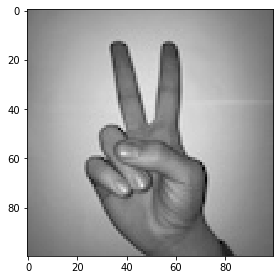

In [12]:
Datos,etiquetas = utils.shuffle(Datos,etiquetas)

print (etiquetas[195])
io.imshow(Datos[195,:])
plt.show()

#### DIVISIÓN DE LOS DATOS  en TRAIN y TEST. Normalizacion de los Datos entre 0 y 1


(204, 100, 100)
(1853, 100, 100)
(204, 1)
(1853, 1)


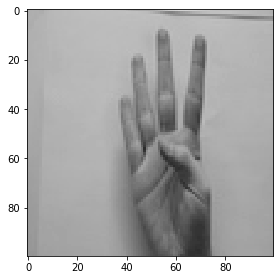

[4.]


In [13]:
tamaño_test=0.1 #representa la proporción del conjunto de datos que se incluirá en la división de prueba.
tamaño_train=0.9 #representa la proporción del conjunto de datos que se incluirá en la división de prueba.

p_test=int(len(Datos[:,1,1])*tamaño_test)
p_train=int(len(Datos[:,1,1])*tamaño_train)

x_test=Datos[0:p_test-1,:,:]/255
x_train=Datos[p_test:p_train+p_test,:,:]/255

Y_test=etiquetas[0:p_test-1,:]
Y_train=etiquetas[p_test:p_train+p_test,:]

print(np.shape(x_test))
print(np.shape(x_train))
print(np.shape(Y_test))
print(np.shape(Y_train))

io.imshow(x_train[42,:])
plt.show()
print (Y_train[42])


(204, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


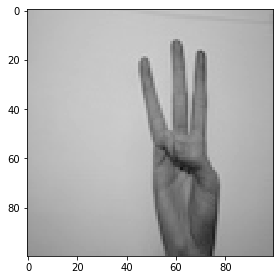

In [14]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)
print(np.shape(Y_test))
print(Y_test[4,:])
io.imshow(x_test[4,:])
plt.show()

#### ADECUACIÓN DE LOS DATOS PARA EL ENTRENAMIENTO

In [15]:
Datos_tensor=tf.expand_dims(x_test, axis=3) #Esta función me devuelve un tensor, asique se debe pasar a array.
X_test = Datos_tensor.numpy()

Datos_tensor2=tf.expand_dims(x_train, axis=3) #Esta función me devuelve un tensor, asique se debe pasar a array.
X_train = Datos_tensor2.numpy()

print(np.shape(X_train))
print(np.shape(X_test))



(1853, 100, 100, 1)
(204, 100, 100, 1)


## CLASIFICADOR_CNN


### ARQUITECTURA DE LA CNN:  

In [16]:
model = Sequential()

# First and second convolutional blocks
# input: 100x100 images with 1 channel -> (100, 100, 1) tensors.
# thise apply 16 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))    # GENERA 16 KERNEL DE 5x5. ES DECIR REALIZA 16 VECES LA CONVOLUCION. lE DA EL ESPESOR
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third and fourth convolutional blocks
# input: 12x12 images with 16 channel -> (12, 12, 16) tensors.
# this applies 32 convolution filters of size 5x5 each.
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Full connected layer
# input: 512
model.add(Flatten())   #REAPILA LA IMAGEN EN UN VECTOR
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Outpup layer
# input: 256
model.add(Dense(10, activation='softmax'))

model.summary()  #PARAM NUMERO DE PESOS

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)       

### Para mostrar la arquitectura de la RED

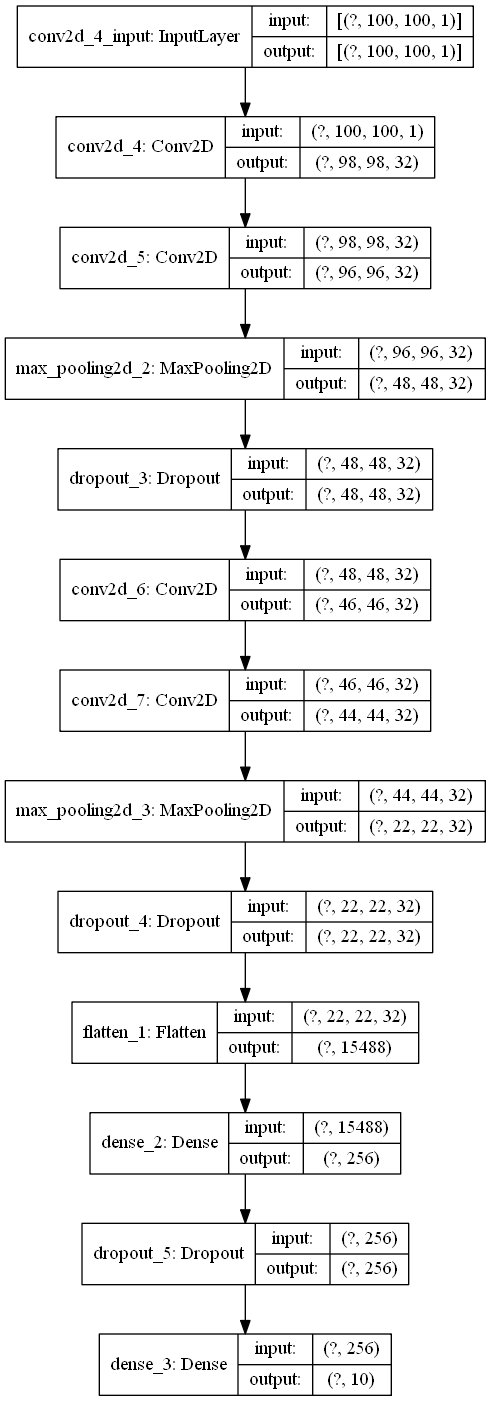

In [17]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB')
Image(retina=True, filename='model.png')

### Compilacion del modelo: declaracion de optimizador y funcion de perdidas

In [18]:
#sgd=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

### Entrenamiento de la RED

In [19]:
batch_size = 100
epochs = 77
porc_datos_validacion = 0.2

red_CNN = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split = porc_datos_validacion)


Epoch 1/77
15/15 [==============================] - 12s 813ms/step - loss: 2.3424 - accuracy: 0.1120 - val_loss: 2.3009 - val_accuracy: 0.2022
Epoch 2/77
15/15 [==============================] - 12s 782ms/step - loss: 2.2911 - accuracy: 0.1768 - val_loss: 2.2516 - val_accuracy: 0.1941
Epoch 3/77
15/15 [==============================] - 12s 782ms/step - loss: 1.9911 - accuracy: 0.3097 - val_loss: 1.4140 - val_accuracy: 0.5229
Epoch 4/77
15/15 [==============================] - 12s 781ms/step - loss: 1.3385 - accuracy: 0.5405 - val_loss: 0.9716 - val_accuracy: 0.6846
Epoch 5/77
15/15 [==============================] - 12s 784ms/step - loss: 1.0019 - accuracy: 0.6498 - val_loss: 0.7441 - val_accuracy: 0.7790
Epoch 6/77
15/15 [==============================] - 12s 781ms/step - loss: 0.8572 - accuracy: 0.7085 - val_loss: 0.6666 - val_accuracy: 0.7898
Epoch 7/77
15/15 [==============================] - 12s 781ms/step - loss: 0.7382 - accuracy: 0.7490 - val_loss: 0.6297 - val_accuracy: 0.8086

### GUARDAR MODELO

In [ ]:
#Guarda el modelo
autoencoder_CNN.save("C:/Users/Celeste/Desktop/Python_proyects/Autoencoders/modelo_CNN")  #especificar carpeta

#Cargar el modelo
#autoencoder2 = AutoEncoder.load("C:/Users/Celeste/Desktop/Python_proyects/Autoencoders/modelo_CNN"')  #carga el modelo
#autoencoder2.summary()  #muestra el modelo

### EVALUACIÓN DEL MODELO

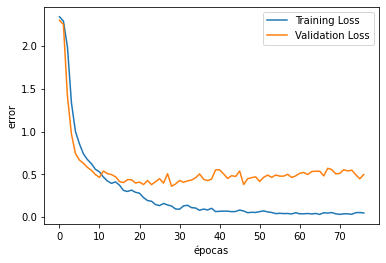

In [20]:
#En esta etapa se utilizarán los datos de validación para evaluar el entrenamiento. Los datos de validación son un porcentaje 
# de los datos de entrenamiento destinados a seguir la evolución del entrenamiento. Estos datos no participan del entrenamiento.
# Se generan gráficos que sirven para evaluar el entrenamiento: overfiting

fig = plt.figure()
plt.ylabel('error')
plt.xlabel('épocas')
plt.plot(red_CNN.history["loss"], label="Training Loss")
plt.plot(red_CNN.history["val_loss"], label="Validation Loss")
plt.legend()


In [21]:
predicciones = model.predict(X_test)
pre = []
tru = []
for i,j in zip(predicciones, Y_test):
    pre.append(np.argmax(i))
    tru.append(np.argmax(j))

#pre = np.array(pre)
#tru = np.array(tru)
print(np.array(pre))
print(np.array(tru))

[7 4 4 9 7 5 0 8 1 8 8 8 6 7 8 1 5 2 4 2 4 8 3 2 4 3 4 1 0 4 7 5 4 0 2 7 8
 1 6 2 7 2 5 9 6 3 9 0 0 6 3 7 1 2 6 4 6 6 4 6 1 4 9 2 9 0 9 8 7 2 2 4 2 3
 2 5 6 9 1 5 8 8 1 4 8 0 4 9 1 9 9 0 2 6 3 6 7 0 6 4 5 6 3 3 5 0 9 8 6 2 1
 1 1 5 5 2 2 6 2 1 6 6 5 6 5 3 9 7 2 1 5 9 6 5 1 8 0 2 3 6 9 5 2 6 8 8 3 8
 8 0 7 4 0 1 6 6 1 5 0 6 0 7 4 6 2 5 1 2 1 9 2 1 1 0 1 3 4 8 1 7 7 2 3 1 6
 6 4 1 6 0 3 8 8 2 2 2 3 5 6 0 8 6 5 1]
[7 4 4 9 6 5 0 8 1 8 8 8 6 7 8 1 5 2 7 2 4 8 3 2 4 3 4 1 0 4 7 5 4 0 2 7 8
 1 4 2 7 2 5 9 4 3 9 0 0 6 2 7 1 2 6 4 6 6 4 6 1 4 9 2 9 0 9 4 7 2 2 4 2 3
 2 5 7 9 1 5 8 8 9 7 8 0 4 9 1 9 9 0 2 6 3 6 7 0 6 4 5 6 3 3 5 0 8 7 6 2 2
 1 1 5 5 2 2 6 2 1 6 6 5 4 5 3 9 7 7 1 5 0 6 5 1 8 0 2 3 6 9 5 2 6 8 8 3 8
 8 0 7 7 1 1 6 8 1 5 0 6 0 7 4 6 3 5 1 2 1 9 2 1 1 0 1 3 4 8 1 7 7 6 3 1 6
 6 4 1 7 0 3 7 8 6 2 2 3 5 6 0 8 6 5 1]


In [22]:
from sklearn.metrics import confusion_matrix
cf_mt = confusion_matrix(tru, pre)
print (cf_mt)

[[17  0  0  0  0  0  0  0  0  1]
 [ 1 24  0  0  0  0  0  0  0  0]
 [ 0  1 23  1  0  0  0  0  0  0]
 [ 0  0  1 14  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  3  0  1  0]
 [ 0  0  0  0  0 19  0  0  0  0]
 [ 0  0  2  0  0  0 24  1  0  0]
 [ 0  0  1  0  3  0  2 13  2  0]
 [ 0  0  0  0  0  0  1  0 18  1]
 [ 0  1  0  0  0  0  0  0  0 13]]


<class 'numpy.ndarray'>


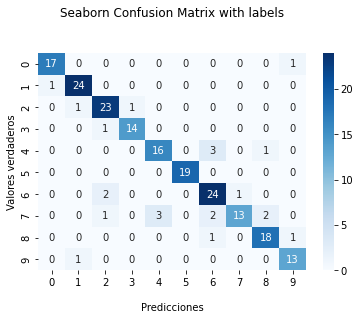

In [23]:
import seaborn as sns
print (type(cf_mt))

ax = sns.heatmap(cf_mt, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicciones')
ax.set_ylabel('Valores verdaderos');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8','9'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8','9'])

## Display the visualization of the Confusion Matrix.
plt.show()